# Problem

Implement a Naive Bayes classifier in R to apply it to the task of classifying handwritten digits. Files mnist-train and mnist-test contain training and test digits, together with their ground truth labels (first column). Each row in these files corresponds to a different digit. Each image is 28x28, hence there are 784 pixel in every image. Columns 2-785 in the data files correspond to the pixel intensity, a value between 0 to 255. Column 1 corresponds to the correct label for each digit.

You need to convert the pixel intensities to a single binary indicator feature (Fi)
 for each pixel. Specifically, if the intensity is smaller than 255/2 map it to a zero, otherwise to a one.

In [1]:
#The format is label, pix-11, pix-12, pix-13, ...
train = read.csv('mnist_train.csv', header = FALSE)
test = read.csv('mnist_test.csv', header = FALSE)

#converting the intensity values to binary. yes->filled-in(1) no->blank(0)
train = cbind(train[,1],round(train[,2:ncol(train)]/255))
test = cbind(test[,1],round(test[,2:ncol(test)]/255))

# 1. Estimate the priors P(class)
 Based on the frequencies of different classes in the training set. Report the values in a table. Round to 3 decimal places.

In [9]:
library(data.table)
prior = table(train[,1])/sum(table(train[,1]))
priorTable = as.data.table(prior)
setnames(priorTable, names(priorTable), c("Digit", "Prior Prob."))
priorTable

Digit,Prior Prob.
<chr>,<dbl>
0,0.09871667
1,0.11236667
2,0.09930000
3,0.10218333
4,0.09736667
5,0.09035000
6,0.09863333
7,0.10441667
8,0.09751667


In [38]:
prior


         0          1          2          3          4          5          6 
0.09871667 0.11236667 0.09930000 0.10218333 0.09736667 0.09035000 0.09863333 
         7          8          9 
0.10441667 0.09751667 0.09915000 

In [10]:
table(train[,1])


   0    1    2    3    4    5    6    7    8    9 
5923 6742 5958 6131 5842 5421 5918 6265 5851 5949 

$P(Fi=f|class) = \frac{((Number of times pixel i has value f in training examples for given class) + k)}{((Total number of training examples for given class) + k*V)} $


Note that you have to smooth the likelihoods to ensure that there are no zero counts. Laplace smoothing is a very simple method that increases the observation count of every value f by some constant k. This corresponds to adding k to the numerator above, and k∗V
 to the denominator (as shown in the equation above), where V is the number of possible values the feature can take on. The higher the value of k, the stronger the smoothing. Experiment with different integer values of k from 1 to 5. While you need to find all the likelihoods for k=1 to 5, I’d like you to report the following values in your report: For k=1 and k=5 P(F682=0|class=5)
 and P(F772=1|class=9)
. Round to 3 decimal places.

To estimate the required likelihoods, we step through the data systematically, processing each row within its class (0 through 9) and applying each smoothing constant (k, values 1 through 5) incrementally.

In [13]:
##loop through k values 1-5 and class values 0-9 to populate a list of pixel intensity = 1 likelihoods
# blkLkList = 5 x 10 x 784. Note that we don't need whiteLikelihood because it's = 1 - blackLikelhoods
   
blkLklist = list()
for (k in 1:5){
    #initilizing the likelihood matrix. 
    #This matrix is 10x784.
 # e.g. Element of this blkLk(10,784) gives you the prob of pixel 784 being black(1), given that the digit is 9.
    blkLkMatrix = matrix(nrow = 10, ncol = ncol(train)-1)
    for (class in 0:9){
        #Extracting similar digits from train set
        simDigit = train[train[,1]==class,]
        blkLkMatrix[class+1,]=(colSums(simDigit[,2:ncol(train)])+k)/(nrow(simDigit)+2*k)
        blkLklist[[k]] =blkLkMatrix 
    }
}

In [15]:
blkLklist

0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,⋯,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764,0.0001687764
0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,⋯,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800,0.0001482800
0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,⋯,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852,0.0001677852
0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,⋯,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523,0.0001630523
0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,⋯,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157,0.0001711157
0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,⋯,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998,0.0001843998
0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,⋯,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189,0.0001689189
0.0001595660,0.0001595660,0.0001595660,0.0001595660,0.0001595660,0.0001595660,0.0001595660,0.0001595660,0.0001595660,0.0001595660,⋯,0.0062230732,0.0022339237,0.0012765278,0.0004786979,0.0004786979,0.0001595660,0.0001595660,0.0001595660,0.0001595660,0.0001595660
0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,⋯,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526,0.0001708526
0.0001680390,0.0001680390,0.0001680390,0.0001680390,0.0001680390,0.0001680390,0.0001680390,0.0001680390,0.0001680390,0.0001680390,⋯,0.0008401949,0.0008401949,0.0010082339,0.0005041170,0.0003360780,0.0001680390,0.0001680390,0.0001680390,0.0001680390,0.0001680390
0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,⋯,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388,0.0003374388


In [22]:
cat("k=1,F682=0,class=5:",round(1-blkLklist[[1]][6,682],digits=3))

k=1,F682=0,class=5: 0.85

In [23]:
cat("k=5,F682=0,class=5:",round(1-blkLklist[[5]][6,682],digits=3))

k=5,F682=0,class=5: 0.85

In [27]:
cat("k=1,F772=1,class=9:",round(blkLklist[[1]][10,772],digits=3))

k=1,F772=1,class=9: 0.001

In [28]:
cat("k=5,F772=1,class=9:",round(blkLklist[[5]][10,772],digits=3))

k=5,F772=1,class=9: 0.002

In [29]:
simDigits = lapply(0:9, function(digitClass) train[train[,1] == digitClass,-1])
blkLk = lapply(1:5, function(k)
    lapply(simDigits, function(x) (colSums(x)+k)/(nrow(x)+2*k))
    )

data.table(k = c(1, 5),
           'p(F682=0|class=5)' = c(1 - blkLk[[1]][[6]][682],
                                    1 - blkLk[[5]][[6]][682]),
           'p(F772=1|class=9)' = c(blkLk[[1]][[10]][772],
                                    blkLk[[5]][[10]][772]) 
)

k,p(F682=0|class=5),p(F772=1|class=9)
<dbl>,<dbl>,<dbl>
1,0.8504518,0.001008234
5,0.8499356,0.001678134


### 3. Perform maximum a posteriori (MAP) classification of test digits according to the learned Naive Bayes model. Suppose a test image has feature values $f_1,f_2,...,f_{784}$. According to this model, the posterior probability (up to scale) of each class given the digit is given by:

$P(class)P(f_1|class)(f_2|class)...P(f_{784}|class))$

<b>Note that in order to avoid underflow, you need to work with the log of the above quantity:</b>

$logP(class)+logP(f_1|class)+logP(f_2|class)+...+logP(f_{784}|class)$

<b>Compute the above decision function values for all ten classes for every test image, then use them for MAP classification.</b>

At this point, training is complete and we turn our attention to the test data.

In [32]:
predList = list()
predList = lapply(1:5, function(k){
    subPred=matrix()
    subPred = sapply(1:nrow(test), function(i) {
    post1= rowSums(log(sweep(blkLklist[[k]], MARGIN =2,as.matrix(test[i,2:785]), "*") + sweep(1-blkLklist[[k]], MARGIN =2,1-as.matrix(test[i,2:785]), "*")))+log(prior)
    which(post1 == max(post1)) - 1
    }
    )
})

For the first test image, report the log posterior probability of $P(class=5|f_1,f_2,...,f_{784})$ and $P(class=7|f_1,f_2,...,f_{784})$ for k=1 and k=5.

In [43]:
test1 = rowSums(log(sweep(blkLklist[[1]], MARGIN =2,as.matrix(test[1,2:785]), "*") + sweep(1-blkLklist[[1]], 
    MARGIN =2,1-as.matrix(test[1,2:785]), "*")))+log(prior)

In [51]:
test1


        0         1         2         3         4         5         6         7 
-268.9725 -301.7044 -245.1951 -218.8738 -193.4570 -206.0909 -292.5226 -114.6257 
        8         9 
-220.3313 -163.1784 

In [44]:
cat("k=1, P(class=5|f_1, f_2,..., f_{784}): ",round(test1[6],digits=3))

k=1, P(class=5|f_1, f_2,..., f_{784}):  -206.091

In [45]:
cat("k=1, P(class=7|f_1, f_2,..., f_{784}): ",round(test1[8],digits=3))

k=1, P(class=7|f_1, f_2,..., f_{784}):  -114.626

In [52]:
test5 = rowSums(log(sweep(blkLklist[[5]], MARGIN =2,as.matrix(test[1,2:785]), "*") + sweep(1-blkLklist[[5]], 
    MARGIN =2,1-as.matrix(test[1,2:785]), "*")))+log(prior)
test5


        0         1         2         3         4         5         6         7 
-265.0621 -294.8906 -240.5940 -218.2536 -192.9275 -205.9109 -282.8110 -115.0183 
        8         9 
-219.2909 -163.4300 

In [47]:
cat("k=5, P(class=5|f_1, f_2,..., f_{784}): ",round(test5[6],digits=3)) 

k=5, P(class=5|f_1, f_2,..., f_{784}):  -205.911

In [48]:
cat("k=5, P(class=7|f_1, f_2,..., f_{784}): ",round(test5[8],digits=3))

k=5, P(class=7|f_1, f_2,..., f_{784}):  -115.018

### 4. Use the true class labels of the test images from the mnist test file to check the correctness of the estimated label for each test digit. Report your performance in terms of the classification rate (percentage of all test images correctly classified) for each value of k from 1 to 5.

It is time to see which smoothing constant, k, delivered the highest percentage of correct classifications.

In [67]:
library(caret)

confMatrix = lapply(1:5, function(k) confusionMatrix(as.factor(predList[[k]]), as.factor(test[,1])) )
acc = lapply(1:5,function(k) print(confMatrix[[k]]$overall[[1]]))
acc

[1] 0.8427
[1] 0.8425
[1] 0.8419
[1] 0.8417
[1] 0.8412


[[1]]
[1] 0.8427

[[2]]
[1] 0.8425

[[3]]
[1] 0.8419

[[4]]
[1] 0.8417

[[5]]
[1] 0.8412

It looks like k=1 is the winner at 84.27%.

In [69]:
acc

[[1]]
[1] 0.8427

[[2]]
[1] 0.8425

[[3]]
[1] 0.8419

[[4]]
[1] 0.8417

[[5]]
[1] 0.8412

In [107]:
kDf <- data.frame(cbind(c(1,2,3,4,5),unlist(acc)))
colnames(kDf) <- c("k","Accuracy")
kDf

k,Accuracy
<dbl>,<dbl>
1,0.8427
2,0.8425
3,0.8419
4,0.8417
5,0.8412


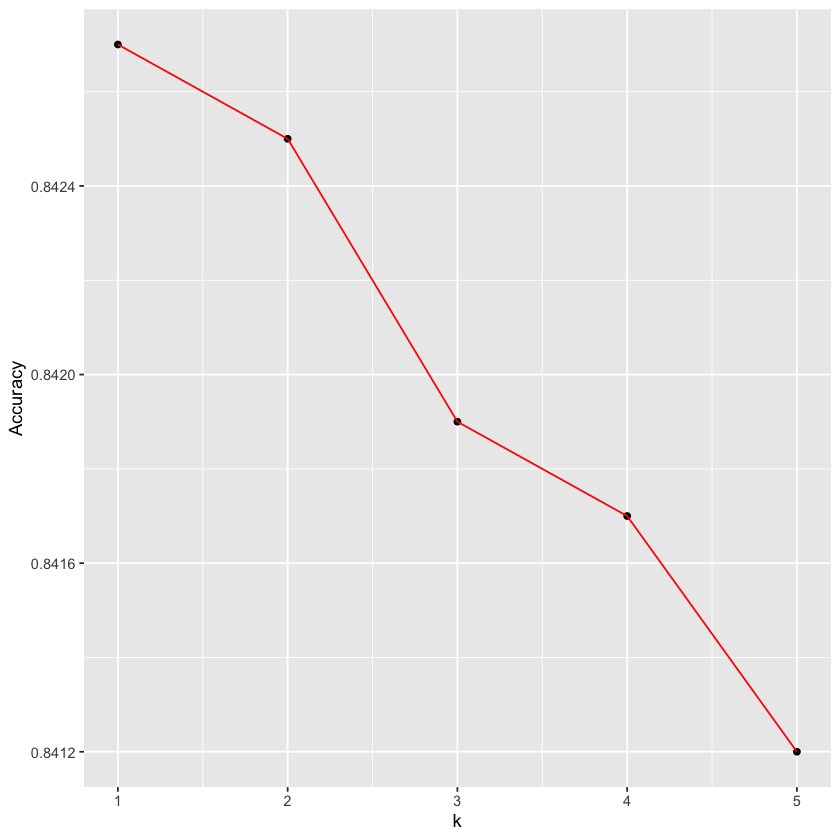

In [110]:
library(ggplot2)

ggplot(data=kDf, aes(x=k, y=Accuracy)) + geom_point() + geom_line(color="red")

### 5. Report your confusion matrix for the best k. This is a 10x10 matrix whose entry in row r and column c is the percentage of test images from class r that are classified as class c. (Tip: You should be able to achieve at least 70% accuracy on the test set.)

In [115]:
print(confMatrix[[1]])$table

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9
         0  882    0   17    4    2   16   17    2   10   12
         1    0 1086   14   17    7   11   14   33   28   13
         2    3    6  840   36    4    5   15   17   12    6
         3    4    5   32  839    0  106    1    3   68    8
         4    1    0   21    1  799   24   14   17   16   64
         5   51    9    5   30    2  655   37    0   27    9
         6   21    4   28    7   16   18  853    0   10    0
         7    1    0   16   13    2    8    0  864    6   29
         8   17   25   57   44   12   24    7   25  762   21
         9    0    0    2   19  138   25    0   67   35  847

Overall Statistics
                                          
               Accuracy : 0.8427          
                 95% CI : (0.8354, 0.8498)
    No Information Rate : 0.1135          
    P-Value [Acc > NIR] : < 2.2e-16       
                                         

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9
         0  882    0   17    4    2   16   17    2   10   12
         1    0 1086   14   17    7   11   14   33   28   13
         2    3    6  840   36    4    5   15   17   12    6
         3    4    5   32  839    0  106    1    3   68    8
         4    1    0   21    1  799   24   14   17   16   64
         5   51    9    5   30    2  655   37    0   27    9
         6   21    4   28    7   16   18  853    0   10    0
         7    1    0   16   13    2    8    0  864    6   29
         8   17   25   57   44   12   24    7   25  762   21
         9    0    0    2   19  138   25    0   67   35  847